## <strong> Learning Rate Decay </strong>

Learning Rate가 너무 큰 경우 loss 값을 빠르게 내릴 수 있지만 최적의 학습에 벗어날 수 있다. <br>
작은 경우 최적의 학습이 가능하지만 해당 단계까지 가는데 너무 오랜 시간이 걸린다. <br>
따라서 처음 시작시 Learning Rate 값을 크게 주고 값을 감소시켜서 최적의 학습을 더 빠르게 도달할 수 있게 하는 방법을 **Learning Rate Decay**라고 한다.

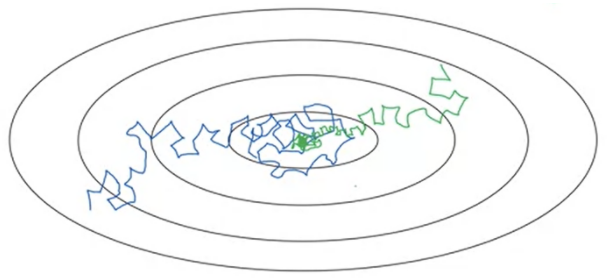

위 그림에서 파란색 선은 constant learning rate를 사용한 이미지이다. <br>
constant learning rate를 사용하게 되면 minima를 향해가는 step들이 특정 iteration 이후에 진동하기 시작한다. 

하지만 Learning Decay를 사용한 초록색 선은 처음에는 큰 learning rate를 가지고 빠르게 minima에 수렴한다. <br>
하지만 minima에 수렴할 수록 learing rate가 감소하고 이후에 minima 구역에서 진동할 때 minima랑 가까운 지역에서 진동하게 된다. 

<h3> <strong> Learning rate decay (common mathod) </strong> </h3>

$a = \frac{1}{1+decayRate × epochNumber} × a_0$

* a: learning rate
* a0: Initial learning rate
* decayRate: hyper-parameter for the method

$a_0 = 0.2, \, decayRate=1$인 경우 learning rate는 아래와 같이 감소한다.

* Epoch1: 0.1
* Epoch1: 0.067
* Epoch1: 0.05
* Epoch1: 0.04

<h3> <strong> Other mathod </strong> </h3>

**(1) Exponential Decay**

$a = (decayRate^{epochNumber})*a_0$

decayRate는 1보다 작아야 하며 0.95가 가장 흔하게 사용된다.

**(2) Discrete Staircase**

이 방법은 learning rate를 매번 특정 시간 간격마다 감소시킨다. <br>
예를 들어서 10초 마다 learning rate를 반으로 줄일 수 있다.

**(3) Epoch Number Based**

$a = \frac{k}{\sqrt{epochNumber}} × a_0$

k라는 수를 지정하고 epoch 횟수의 루트값으로 나누어 조정할 수도 있다.

**(4) Mini-batch Number based**

$a = \frac{k}{\sqrt{t}}×a_0$

k라는 수를 지정하고 mini-batch 개수의 루트값으로 나눠어 조정할 수도 있다.

##  <strong> Pytorch - learning rate scheduler </strong>

<h3> <strong> LambdaLR </strong> </h3>

**LambdaLR**은 가장 유연한 learning rate shaeduler이다. <br>

**torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch=- 1, verbose=False)**

* last_epoch: The index of last epoch. Defult:-1
* verbose: If True, prints a message to stdout for each update. Default False

In [44]:
import torch

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: 0.95**epoch)

아래처럼 scheduler.step()을 사용하면 learning rate를 갱신해준다. <br>
또한 **optimizer.param_groups[0]['lr']**을 사용하면 learning rate에 접근할 수 있다.

In [45]:
learning_rates = []

for i in range(100):
  optimizer.step() # 안해주면 경고 발생
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

아래 그래프를 보면 learning rate가 잘 감소하는 것을 확인할 수 있다.

In [48]:
learning_rates[:5]

[0.1, 0.095, 0.09025, 0.0857375, 0.081450625]

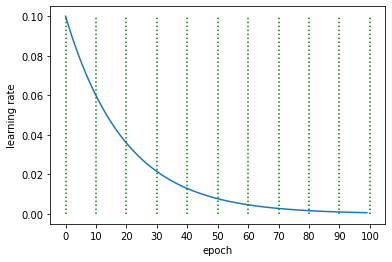

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

위처럼 lambda 형식이 아니라 일반적인 함수를 넘겨줘도 된다.

In [62]:
def conversion(epoch):
  if epoch < 30:
    return 1
  elif epoch < 60:
    return 0.1
  else:
    return 0.01

In [63]:
model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=conversion)

In [64]:
learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

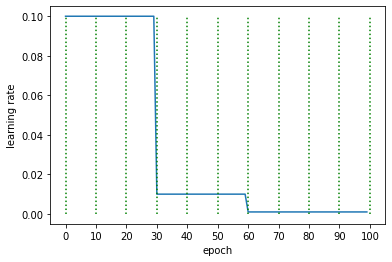

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

**Lambda_LR을 상속받아 클래스를 생성할 수도 있다.**

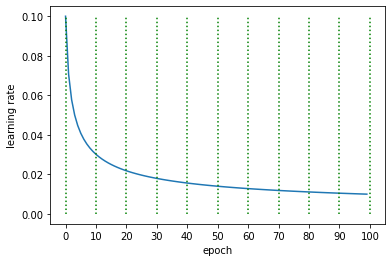

In [61]:
import torch
import matplotlib.pyplot as plt

class Scheduler(torch.optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, k, last_epoch=-1):

        def lr_lambda(epoch):
          return k / (epoch+1)**.5 # epoch는 0부터 시작해서 1을 더하지 않으면 에러가 발생한다.

        super(Scheduler, self).__init__(optimizer, lr_lambda, last_epoch=last_epoch)

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = Scheduler(optimizer, k = 1)

learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

<h3> <strong> StepLR </strong> </h3>

StepLR은 가장 흔히 사용되는 scheduler중 하나다. <br>

**torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=- 1, verbose=False)**

* step_size: Period of Learning rate decay
* gamma: Multiplicative factor of learning rate decay. Defalut: 0.1

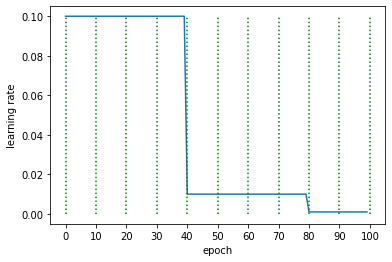

In [67]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

<h3> <strong> MultiStepLR </strong> </h3>

StepLR은 일정 간격으로 lr을 감소시켰지만 **MultiStepLR**은 우리가 정한 구간에서 lr를 갱신시킬 수 있다.

**torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1, last_epoch=- 1, verbose=False)**

* milestones: List of epoch indices. Must be increasing.

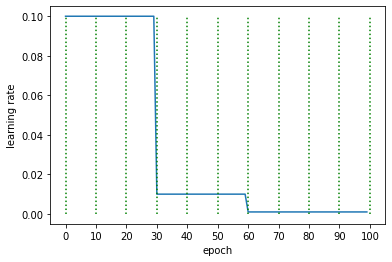

In [68]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 60], gamma=0.1)

learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

<h3> <strong> ExponentialLR </strong> </h3>

ExponentialLR은 lr을 지수적으로 감소시키는 방식이며 많이 쓰이는 방법중 하나이다.

**torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma, last_epoch=- 1, verbose=False)**

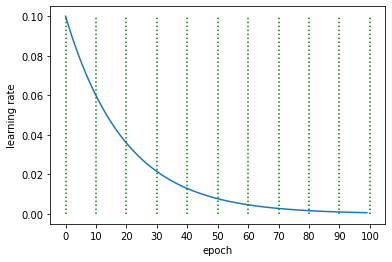

In [69]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

<h3> <strong> CosineAnnealingLR</strong> </h3>

최근에는 learning rate가 단순 감소하는 것 보다 진동하면서 최적점을 찾아가는 방식을 많이 사용한다. <br>
이러한 방식 중 가장 많이 사용되는 방법이 **CosineAnnealingLR**방식이다.

**torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0, last_epoch=- 1, verbose=False)**

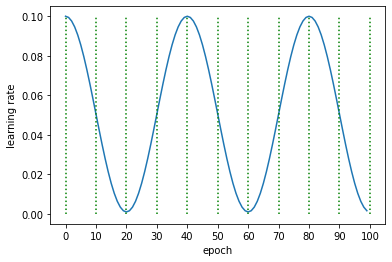

In [75]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.001)

learning_rates = []

for i in range(100):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(100), learning_rates)
for i in range(0, 110, 10):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 110, 10))
plt.show()

<h3> <strong> CyclicLR</strong> </h3>

**CyclicLR**방법 역시 많이 사용하는 방법중 하나이다. <br>
CosineAnnealingLR은 단순한 cosine 곡선이지만 CyclicLR은 3가지 모드를 지원하여 변화된 형태로 주기적인 learning rate 증감을 지원한다.

**torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr, max_lr, step_size_up=2000, step_size_down=None, mode='triangular', gamma=1.0, scale_fn=None, scale_mode='cycle', cycle_momentum=True, base_momentum=0.8, max_momentum=0.9, last_epoch=- 1, verbose=False)**

* base_lr: Initial learning rate which is the lower boundary in the cycle for each parameter group.
* max_lr: Upper learning rate boundaries in the cycle for each parameter group.
* step_size_up: Number of training iterations in the increasing half of a cycle. Default: 2000
* step_size_down: Number of training iterations in the decreasing half of a cycle. If step_size_down is None, it is set to step_size_up. Default: None
* **mode**: One of **{triangular, triangular2, exp_range}**. Values correspond to policies detailed above. If scale_fn is not None, this argument is ignored. Default: ‘triangular’
* gamma: Constant in ‘exp_range’ scaling function: gamma**(cycle iterations) Default: 1.0

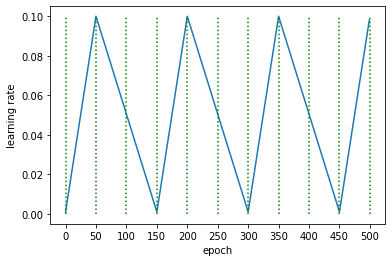

In [86]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=50, step_size_down=100, mode='triangular')

learning_rates = []

for i in range(500):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(500), learning_rates)
for i in range(0, 550, 50):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 550, 50))
plt.show()

아래처럼 step_size_down을 None으로 주면 step_size_up과 동일한 값을 가지게 된다. <br>
triangular2 mode는 cycle이 끝날 때 마다 max_lr을 0.5배씩 감소시킨다.

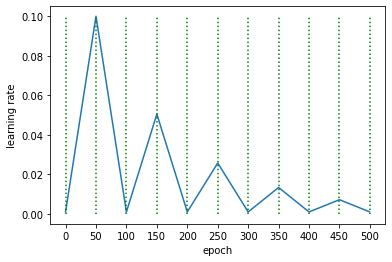

In [87]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=50, step_size_down=None, mode='triangular2')

learning_rates = []

for i in range(500):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(500), learning_rates)
for i in range(0, 550, 50):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 550, 50))
plt.show()

exp_range모드는 triangular2와 유사하지만 선형 증감이 아니라 지수적 증감 방식을 사용한다. <br>
따라서 gamma를 매개변수로 추가로 줘야한다.

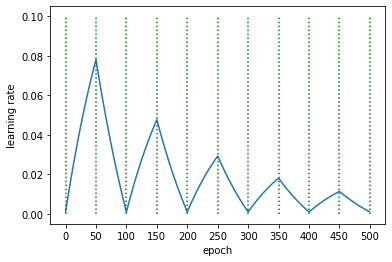

In [93]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=50, step_size_down=None, mode='exp_range', gamma=0.995)

learning_rates = []

for i in range(500):
  optimizer.step()
  learning_rates.append(optimizer.param_groups[0]['lr'])
  scheduler.step()

plt.plot(range(500), learning_rates)
for i in range(0, 550, 50):
  plt.plot([i, i], [0, 0.1], 'g:')
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.xticks(range(0, 550, 50))
plt.show()

**출처**
* https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b
* https://gaussian37.github.io/dl-pytorch-lr_scheduler/
* https://pytorch.org/docs/stable/optim.html